# Machine learning to identify types of glass.  

For this project I will determine the optimal machine learning model for us in glassifying glass as one of 7 types based on its refractive index and composition.  I will test logistic regression, k-nearest neighbors, decision tree, random forest, and support vector classifier models.  The data for this project comes from the glass identification dataset from kaggle (https://www.kaggle.com/uciml/glass?select=glass.csv)

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings

warnings.filterwarnings('ignore') 

In [2]:
df=pd.read_csv('glass.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


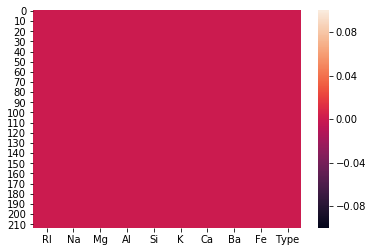

In [5]:
#check for any null values
sns.heatmap(df.isnull())

### Preprocessing

The features need to be scaled so the importance of large-scale features is not overestimated.

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc=StandardScaler()

In [8]:
sc.fit(df.drop('Type', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
sc_feats=sc.transform(df.drop('Type', axis=1))
sc_df=pd.DataFrame(sc_feats, columns=df.columns[:-1])

In [10]:
#Create dataframe of scaled features
sc_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


## Machine Learning Models

In order to determine an approriate model to use in glassifying glasss types I will test several different machine learning techniques and compare their accuracy.

### Logistic Regression

In [11]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [12]:
#separate the data into training and testing sets
X=sc_df
y=df['Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [13]:
#create the model, fit to the data, and test
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
lr_pred=logreg.predict(X_test)
lr_score=accuracy_score(y_test,lr_pred)

In [14]:
lrcm=(confusion_matrix(y_test, lr_pred))

In [15]:

print(classification_report(y_test,lr_pred))
print('\n')
print(lr_score)

              precision    recall  f1-score   support

           1       0.67      0.59      0.63        27
           2       0.34      0.69      0.46        16
           3       0.00      0.00      0.00         9
           5       0.75      0.60      0.67         5
           6       0.00      0.00      0.00         4
           7       0.50      0.50      0.50         4

   micro avg       0.49      0.49      0.49        65
   macro avg       0.38      0.40      0.38        65
weighted avg       0.45      0.49      0.46        65



0.49230769230769234


### K-Nearest Neighbors

In [16]:
#import KNN
from sklearn.neighbors import  KNeighborsClassifier

First, we need to determine the appropriate number of neighbors to use in the model.  To do this, I check the error rate of k values between 1 and 20.

In [17]:
#use for loop to check each k value and save its error-rate
e_rate=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i=knn.predict(X_test)
    e_rate.append(np.mean(pred_i!=y_test))
    
    

Text(0, 0.5, 'Error-rate')

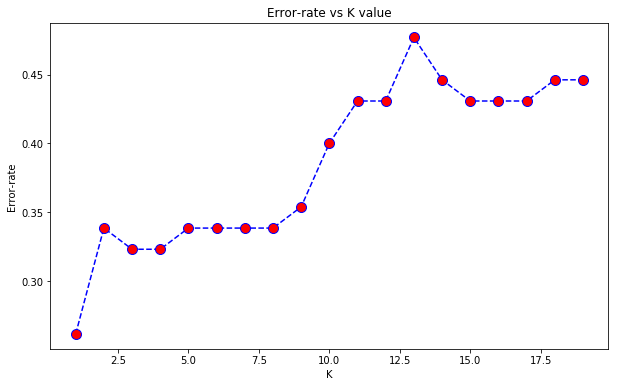

In [18]:
#plot the error-rate for each k value to determine an appropriate choice
plt.figure(figsize=(10,6))
plt.plot(range(1,20), e_rate, color='b', linestyle='--', marker='o', markerfacecolor='r', markersize=10)
plt.title('Error-rate vs K value')
plt.xlabel('K')
plt.ylabel('Error-rate')

Based on the error rates I chose to use 5 as the k value.  At k=5, the error-rate is low and the and the error-rate curve does not show any extreme jumps.

In [19]:
#use the chosen k value to create the model then fit and make predictions
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predK=knn.predict(X_test)


In [20]:
kcm=confusion_matrix(y_test, predK)
k_score=accuracy_score(y_test, predK)
k_score

0.6615384615384615

In [21]:

print(classification_report(y_test,predK))
print('\n')
print()

              precision    recall  f1-score   support

           1       0.66      0.78      0.71        27
           2       0.57      0.81      0.67        16
           3       0.00      0.00      0.00         9
           5       1.00      0.80      0.89         5
           6       0.75      0.75      0.75         4
           7       1.00      0.50      0.67         4

   micro avg       0.66      0.66      0.66        65
   macro avg       0.66      0.61      0.61        65
weighted avg       0.60      0.66      0.62        65






### Decision-Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [23]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predT=dtree.predict(X_test)

In [24]:
dtcm=confusion_matrix(y_test,predT)

In [25]:
print(classification_report(y_test,predT))
print(accuracy_score(y_test,predT))

              precision    recall  f1-score   support

           1       0.82      0.67      0.73        27
           2       0.54      0.81      0.65        16
           3       0.40      0.44      0.42         9
           5       1.00      0.60      0.75         5
           6       0.67      0.50      0.57         4
           7       0.67      0.50      0.57         4

   micro avg       0.65      0.65      0.65        65
   macro avg       0.68      0.59      0.62        65
weighted avg       0.69      0.65      0.65        65

0.6461538461538462


### Random Forest

In [26]:
rfc=RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)
predR=rfc.predict(X_test)

In [27]:
rfcm=confusion_matrix(y_test,predR)

In [28]:
print(classification_report(y_test,predR))
print(accuracy_score(y_test,predR))

              precision    recall  f1-score   support

           1       0.77      0.89      0.83        27
           2       0.61      0.88      0.72        16
           3       1.00      0.22      0.36         9
           5       1.00      0.60      0.75         5
           6       0.75      0.75      0.75         4
           7       1.00      0.50      0.67         4

   micro avg       0.74      0.74      0.74        65
   macro avg       0.86      0.64      0.68        65
weighted avg       0.79      0.74      0.72        65

0.7384615384615385


### Support Vector Classifier

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [30]:
sMod=SVC()
sMod.fit(X_train, y_train)
predS=sMod.predict(X_test)

In [31]:
svccm=confusion_matrix(y_test,predS)

In [32]:
print(classification_report(y_test,predS))
print(accuracy_score(y_test,predS))

              precision    recall  f1-score   support

           1       0.68      0.78      0.72        27
           2       0.48      0.81      0.60        16
           3       0.00      0.00      0.00         9
           5       1.00      0.60      0.75         5
           6       1.00      0.50      0.67         4
           7       1.00      0.50      0.67         4

   micro avg       0.63      0.63      0.63        65
   macro avg       0.69      0.53      0.57        65
weighted avg       0.60      0.63      0.59        65

0.6307692307692307


Since this SVC model used the default parameters, I will use a grid search to find the optimal parameters in the hopes of improving the accuracy.

In [33]:
param_grid={'C':[.1,1,10,100,1000], 'gamma':[1,.1,.01,.001,.0001]}

In [34]:
grid=GridSearchCV(SVC(), param_grid)

In [35]:
grid.fit(X_train, y_train)

C:\Users\sarar\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [36]:
grid_pred=grid.predict(X_test)

In [37]:
print(classification_report(y_test,grid_pred))
print(accuracy_score(y_test,grid_pred))

              precision    recall  f1-score   support

           1       0.71      0.89      0.79        27
           2       0.65      0.81      0.72        16
           3       0.00      0.00      0.00         9
           5       0.67      0.80      0.73         5
           6       1.00      0.75      0.86         4
           7       1.00      0.50      0.67         4

   micro avg       0.71      0.71      0.71        65
   macro avg       0.67      0.63      0.63        65
weighted avg       0.63      0.71      0.65        65

0.7076923076923077


In [38]:
svccm=confusion_matrix(y_test, grid_pred)

## Conclusion

To evaluate the models we can examine the confusion matrices for each one.

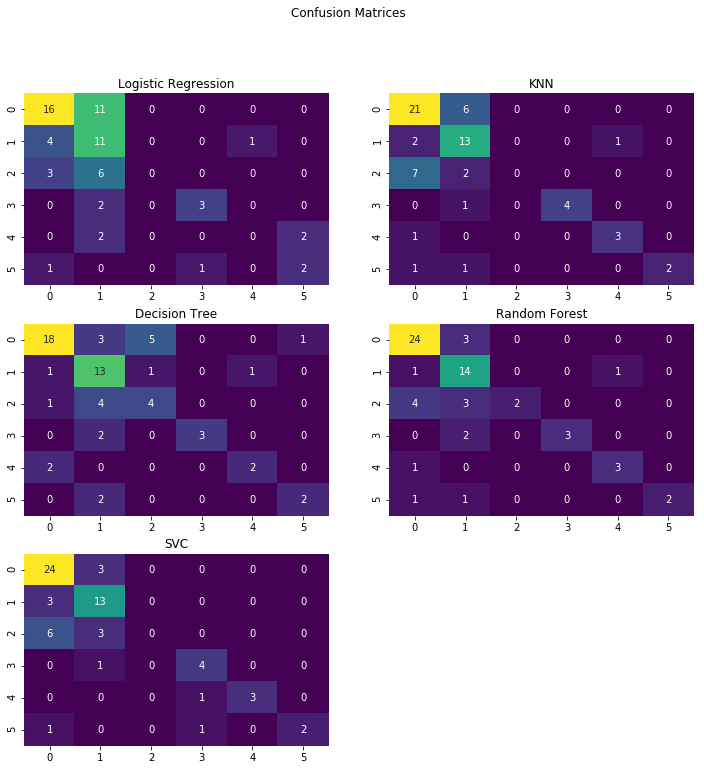

In [39]:
#arrange the confusion matrices so we can loop through them and create a list of the titles for each one
cm_all=[lrcm, kcm, dtcm,rfcm,svccm]
titles=['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVC']
#set up a counter for the subplots and titles
count=1
#plot and label each confusion matrix
plt.subplots(figsize=(12, 12))
plt.suptitle('Confusion Matrices')  
for i in cm_all:
    plt.subplot(3,2,count)
    sns.heatmap(i, annot=True,cbar=False, cmap='viridis')
    plt.title(titles[count-1])
    count+=1


In [40]:
scores=[accuracy_score(y_test,lr_pred),accuracy_score(y_test,predK), accuracy_score(y_test,predT), accuracy_score(y_test,predR),accuracy_score(y_test,grid_pred)]

In [41]:
scoresDict = dict(zip(titles, scores))
sd=pd.DataFrame(scoresDict, index=['Accuracy']).round(3).transpose()

sd['Accuracy']=sd['Accuracy'].apply(lambda x:str(x*100)+'%')

In [42]:
sd

,Accuracy
Logistic Regression,49.2%
KNN,66.2%
Decision Tree,64.60000000000001%
Random Forest,73.8%
SVC,70.8%


The random forest method gives the highest degree of accuracy for this problem.  It correctly predicts the glass type 73.8% of the time.  The logistic regression model is the worst of the group with an accuracy of only 49.2%.